In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("train.csv")

In [24]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
df['family_history_with_overweight'].value_counts()


family_history_with_overweight
yes    12696
no      2837
Name: count, dtype: int64

In [26]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})


In [27]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [28]:
# Assuming the column name is 'Gender' and contains values like 'Male' / 'Female'

df_male = df[df['Gender'].str.lower() == 'male'].copy()
df_female = df[df['Gender'].str.lower() == 'female'].copy()

In [29]:
df_male['WeightCategory'].value_counts()


WeightCategory
Obesity_Type_II        2397
Overweight_Level_II    1325
Obesity_Type_I         1252
Normal_Weight          1072
Overweight_Level_I     1051
Insufficient_Weight     682
Obesity_Type_III          4
Name: count, dtype: int64

In [30]:
df_female['WeightCategory'].value_counts()

WeightCategory
Obesity_Type_III       2979
Normal_Weight          1273
Insufficient_Weight    1188
Obesity_Type_I          955
Overweight_Level_I      793
Overweight_Level_II     556
Obesity_Type_II           6
Name: count, dtype: int64

In [31]:
# Display 5 samples from each obesity type (I, II, III)
for cat in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
    print(f"\n--- {cat} ---")
    display(df_male[df_male['WeightCategory'] == cat].head(5))



--- Obesity_Type_I ---


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
12,12,Male,18.000000,1.811189,108.251044,1,yes,2.0,2.164839,Sometimes,no,2.530157,no,1.0,0.553311,no,Public_Transportation,Obesity_Type_I,32.999286
25,25,Male,41.318302,1.853223,96.078462,1,yes,2.0,3.000000,Sometimes,no,3.000000,no,2.0,0.000000,Frequently,Automobile,Obesity_Type_I,27.975038
31,31,Male,23.000000,1.700000,97.000000,1,no,2.0,3.000000,Sometimes,no,3.000000,no,3.0,0.000000,no,Public_Transportation,Obesity_Type_I,33.564014
41,41,Male,21.000000,1.790000,105.000000,1,yes,2.0,1.703299,Sometimes,no,3.000000,no,1.0,1.000000,Sometimes,Public_Transportation,Obesity_Type_I,32.770513
42,42,Male,21.811190,1.657496,85.000000,1,yes,2.0,3.000000,Sometimes,no,2.371015,no,1.0,0.000000,no,Public_Transportation,Obesity_Type_I,30.939547



--- Obesity_Type_II ---


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
6,6,Male,29.883021,1.754711,112.725005,1,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II,36.610787
7,7,Male,29.891473,1.750150,118.206565,1,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II,38.591446
15,15,Male,28.377958,1.706525,102.592171,1,yes,2.636719,3.000000,Sometimes,no,1.000000,no,1.995582,0.930836,Sometimes,Public_Transportation,Obesity_Type_II,35.228075
19,19,Male,25.492855,1.771817,114.470482,1,yes,1.392665,3.000000,Sometimes,no,1.238057,no,1.097905,0.619012,Sometimes,Public_Transportation,Obesity_Type_II,36.463284
30,30,Male,23.118327,1.851123,119.841446,1,yes,2.203962,2.954446,Sometimes,no,2.854161,no,1.191020,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,34.973290



--- Obesity_Type_III ---


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
6909,6909,Male,26.000000,1.826970,111.946321,1,yes,3.0,3.000000,Sometimes,no,2.679137,no,0.000000,0.162494,Sometimes,Public_Transportation,Obesity_Type_III,33.538759
7206,7206,Male,22.906342,1.849307,122.813033,1,yes,3.0,2.989791,Sometimes,no,1.606076,no,0.942725,0.003695,Sometimes,Public_Transportation,Obesity_Type_III,35.910912
8713,8713,Male,20.000000,1.700000,75.000000,1,yes,3.0,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_III,25.951557
10479,10479,Male,21.948577,1.849998,122.024954,1,yes,3.0,2.806298,Sometimes,no,1.591909,no,0.065820,0.543118,Sometimes,Public_Transportation,Obesity_Type_III,35.653826


In [33]:
# Loop through each obesity type and show descriptive stats
for cat in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
    subset = df_male[df_male['WeightCategory'] == cat]
    print(f"\n===== {cat} ({len(subset)} samples) =====")
    display(subset.describe())



===== Obesity_Type_I (1252 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,7615.717252,23.166763,1.752668,99.886920,0.977636,2.082287,2.628561,2.295191,1.098739,0.872048,32.549194
std,4389.482472,5.247727,0.064920,8.597640,0.147924,0.309685,0.695411,0.554181,0.959897,0.722877,2.657294
min,12.000000,16.000000,1.557943,68.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,23.529412
25%,3966.250000,20.586978,1.701634,94.953177,1.000000,2.000000,2.640312,2.000000,0.027101,0.000000,31.134482
50%,7582.500000,22.087389,1.769269,98.851214,1.000000,2.000000,3.000000,2.116399,1.000000,1.000000,32.692893
75%,11295.750000,23.000000,1.792998,105.483729,1.000000,2.000000,3.000000,2.868141,1.982600,1.477309,33.910035
max,15520.000000,55.000000,1.975663,155.872093,1.000000,3.000000,4.000000,3.000000,3.000000,2.000000,45.543343



===== Obesity_Type_II (2397 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000
mean,7951.564873,27.657833,1.783031,116.190452,0.997914,2.433114,2.803152,1.978784,1.042052,0.415269,36.573041
std,4481.522013,4.221777,0.063625,7.618608,0.045634,0.484093,0.483500,0.547002,0.550514,0.535819,2.103158
min,6.000000,17.000000,1.553127,76.202761,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,24.048460
25%,4143.000000,24.417552,1.753389,112.835195,1.000000,2.049112,2.962004,1.796257,0.782416,0.000000,35.445634
50%,8033.000000,26.684354,1.773594,118.377601,1.000000,2.499388,3.000000,2.009796,1.006884,0.081156,36.390629
75%,11859.000000,30.610436,1.829239,120.921535,1.000000,2.913452,3.000000,2.208068,1.358185,0.739006,38.071625
max,15521.000000,46.491859,1.975663,137.767787,1.000000,3.000000,4.000000,3.000000,3.000000,2.000000,46.222483



===== Obesity_Type_III (4 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,4.000000,4.000000,4.000000,4.000000,4.0,4.0,4.000000,4.000000,4.000000,4.000000,4.000000
mean,8326.750000,22.713730,1.806569,107.946077,1.0,3.0,2.949022,1.969280,0.752136,0.177327,32.763763
std,1637.830348,2.502429,0.071847,22.514344,0.0,0.0,0.095271,0.509630,0.936345,0.255353,4.664182
min,6909.000000,20.000000,1.700000,75.000000,1.0,3.0,2.806298,1.591909,0.000000,0.000000,25.951557
25%,7131.750000,21.461433,1.795227,102.709741,1.0,3.0,2.943918,1.602534,0.049365,0.002771,31.641959
50%,7959.500000,22.427459,1.838138,116.985637,1.0,3.0,2.994896,1.803038,0.504273,0.083095,34.596292
75%,9154.500000,23.679756,1.849480,122.221974,1.0,3.0,3.000000,2.169784,1.207044,0.257650,35.718097
max,10479.000000,26.000000,1.849998,122.813033,1.0,3.0,3.000000,2.679137,2.000000,0.543118,35.910912


In [35]:
# Print CALC values for each obesity type
for cat in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
    subset = df_male[df_male['WeightCategory'] == cat]
    print(f"\n===== {cat} ({len(subset)} samples) =====")
    print(subset['CALC'].value_counts())



===== Obesity_Type_I (1252 samples) =====
CALC
no            608
Sometimes     608
Frequently     36
Name: count, dtype: int64

===== Obesity_Type_II (2397 samples) =====
CALC
Sometimes     2066
no             322
Frequently       9
Name: count, dtype: int64

===== Obesity_Type_III (4 samples) =====
CALC
Sometimes    4
Name: count, dtype: int64


In [34]:
# Loop through each overweight level and show descriptive stats
for cat in ['Overweight_Level_I', 'Overweight_Level_II']:
    subset = df_male[df_male['WeightCategory'] == cat]
    print(f"\n===== {cat} ({len(subset)} samples) =====")
    display(subset.describe())



===== Overweight_Level_I (1051 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,7893.650809,22.319880,1.728858,77.799252,0.668887,2.247327,2.657933,2.187042,1.324333,0.563969,26.020269
std,4558.942264,5.205051,0.072003,6.757429,0.470838,0.464287,0.877888,0.593534,0.856666,0.664993,1.491576
min,8.000000,16.000000,1.456346,52.058335,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,17.451524
25%,3802.500000,19.601841,1.696268,75.000000,0.000000,2.000000,2.920186,2.000000,1.000000,0.000000,25.490870
50%,7928.000000,21.000000,1.718845,75.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.153669,25.951557
75%,11951.000000,22.994002,1.800000,85.000000,1.000000,2.765416,3.000000,2.845696,2.000000,1.000000,26.672763
max,15531.000000,61.000000,1.920000,92.000000,1.000000,3.000000,4.000000,3.000000,3.000000,2.000000,31.837482



===== Overweight_Level_II (1325 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,8009.076226,25.641769,1.731993,84.802272,0.927547,2.163930,2.648619,2.063061,1.118643,0.714231,28.280641
std,4515.882082,7.400292,0.059309,6.051716,0.259334,0.418543,0.691543,0.520523,0.812684,0.633507,1.691428
min,0.000000,16.910997,1.480000,58.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,21.513859
25%,3909.000000,20.976842,1.700000,80.000000,1.000000,2.000000,2.650088,2.000000,0.740633,0.000000,27.253711
50%,8359.000000,23.000000,1.716308,83.952968,1.000000,2.000000,3.000000,2.000000,1.000000,0.951740,28.112981
75%,11965.000000,31.783524,1.769328,88.000000,1.000000,2.048962,3.000000,2.078297,1.810738,1.000000,29.106356
max,15532.000000,56.000000,1.931263,115.000000,1.000000,3.000000,4.000000,3.000000,3.000000,2.000000,36.741456


In [37]:
# Display 5 samples from each obesity type (I, II, III)
for cat in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
    print(f"\n--- {cat} ---")
    display(df_female[df_female['WeightCategory'] == cat].head(5))



--- Obesity_Type_I ---


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
23,23,Female,29.740496,1.502609,77.929204,1,yes,2.000000,1.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,34.515031
48,48,Female,37.000000,1.500000,80.000000,1,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,35.555556
66,66,Female,22.884722,1.622241,82.000000,1,yes,1.754401,1.000000,Sometimes,no,2.165048,no,0.000000,0.301909,Sometimes,Public_Transportation,Obesity_Type_I,31.158971
71,71,Female,21.008051,1.790172,88.126544,1,yes,3.000000,1.104642,Sometimes,no,3.000000,no,1.360994,0.000000,no,Public_Transportation,Obesity_Type_I,27.499020
80,80,Female,38.098745,1.560215,80.000000,1,yes,2.020785,1.169173,Sometimes,no,1.872673,no,1.979355,0.000000,Sometimes,Automobile,Obesity_Type_I,32.864050



--- Obesity_Type_II ---


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
3196,3196,Female,37.542885,1.550000,77.205685,1,yes,2.000000,2.974204,Sometimes,no,1.000000,no,1.463610,0.0,Sometimes,Automobile,Obesity_Type_II,32.135561
13770,13770,Female,30.000000,1.660000,125.000000,1,no,3.000000,3.000000,Sometimes,no,1.000000,no,1.000000,0.0,Sometimes,Automobile,Obesity_Type_II,45.362172
13775,13775,Female,37.974483,1.542122,77.431678,1,yes,2.020785,2.463113,Sometimes,no,1.508908,no,0.732276,0.0,Sometimes,Automobile,Obesity_Type_II,32.559761
14572,14572,Female,32.000000,1.630000,102.000000,1,no,3.000000,1.000000,Sometimes,no,1.000000,no,0.000000,1.0,no,Public_Transportation,Obesity_Type_II,38.390606
14891,14891,Female,18.000000,1.620000,83.000000,1,yes,3.000000,1.000000,Sometimes,no,1.000000,no,1.000000,0.0,Sometimes,Public_Transportation,Obesity_Type_II,31.626276



--- Obesity_Type_III ---


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
3,3,Female,20.952737,1.710730,131.274851,1,yes,3.0,3.0,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
9,9,Female,26.000000,1.638836,111.275646,1,yes,3.0,3.0,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III,41.431355
13,13,Female,21.412538,1.729045,131.529267,1,yes,3.0,3.0,Sometimes,no,1.959531,no,1.425712,0.947884,Sometimes,Public_Transportation,Obesity_Type_III,43.995657
22,22,Female,25.918524,1.663341,112.579220,1,yes,3.0,3.0,Sometimes,no,2.724099,no,0.000000,0.081156,Sometimes,Public_Transportation,Obesity_Type_III,40.690746
26,26,Female,26.000000,1.611462,111.950113,1,yes,3.0,3.0,Sometimes,no,2.609052,no,0.000000,0.079334,Sometimes,Public_Transportation,Obesity_Type_III,43.110633


In [38]:
# Loop through each obesity type and show descriptive stats
for cat in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
    subset = df_female[df_female['WeightCategory'] == cat]
    print(f"\n===== {cat} ({len(subset)} samples) =====")
    display(subset.describe())



===== Obesity_Type_I (955 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,7685.321466,27.542728,1.616784,82.502721,0.993717,2.114662,2.223648,1.897094,0.637450,0.551371,31.605836
std,4389.630028,8.665950,0.057955,6.150676,0.079056,0.467297,0.930778,0.656076,0.783634,0.692235,2.329562
min,23.000000,16.270434,1.498561,40.202773,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,17.099278
25%,4074.000000,21.856301,1.571417,80.000000,1.000000,2.000000,1.000000,1.263216,0.000000,0.000000,30.782986
50%,7618.000000,23.000000,1.616533,82.000000,1.000000,2.000000,2.993623,2.000000,0.181324,0.000000,31.680120
75%,11321.500000,37.703767,1.650000,83.788062,1.000000,2.064893,3.000000,2.146738,1.000000,1.000000,32.568432
max,15513.000000,55.000000,1.930000,152.567671,1.000000,3.000000,4.000000,3.000000,3.000000,2.000000,46.805188



===== Obesity_Type_II (6 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,12538.333333,30.749193,1.626350,96.154174,1.0,2.403042,2.390851,1.251485,0.841881,0.281343,36.081753
std,4608.359043,7.296090,0.078630,20.045721,0.0,0.691205,1.173595,0.419409,0.481147,0.446878,5.280093
min,3196.000000,18.000000,1.542122,77.205685,1.0,1.397468,1.000000,1.000000,0.000000,0.000000,31.626276
25%,13771.250000,29.233344,1.567500,78.823758,1.0,2.005196,1.365778,1.000000,0.763057,0.000000,32.241611
50%,14173.500000,31.000000,1.625000,92.500000,1.0,2.510393,2.718659,1.000000,0.927700,0.000000,34.487952
75%,14811.250000,36.157164,1.652500,109.715758,1.0,3.000000,2.993551,1.381681,1.000000,0.516043,37.896990
max,15026.000000,37.974483,1.755978,125.000000,1.0,3.000000,3.907790,2.000000,1.463610,1.000000,45.362172



===== Obesity_Type_III (2979 samples) =====


,id,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.0,2979.0,2979.000000,2979.000000,2979.000000,2979.000000
mean,7765.383350,24.095914,1.676239,117.874506,0.999664,3.0,3.0,2.336901,0.554515,0.548708,41.829157
std,4478.832154,2.591670,0.059034,13.428311,0.018322,0.0,0.0,0.573859,0.733555,0.295095,2.667451
min,3.000000,18.112503,1.520000,42.000000,0.000000,3.0,3.0,1.000000,0.000000,0.000000,18.178670
25%,3960.500000,21.501721,1.629442,109.978402,1.000000,3.0,3.0,1.907216,0.000000,0.255553,40.426005
50%,7836.000000,25.955361,1.643786,111.919155,1.000000,3.0,3.0,2.618198,0.035928,0.565315,41.778707
75%,11580.000000,26.000000,1.735810,132.579270,1.000000,3.0,3.0,2.737353,1.444382,0.825609,43.636949
max,15519.000000,26.699317,1.918859,165.057269,1.000000,3.0,3.0,3.000000,2.892922,2.000000,54.997991


In [15]:
df['SMOKE'].value_counts()

SMOKE
no     15356
yes      177
Name: count, dtype: int64

In [39]:
df_male['SMOKE'].value_counts()

SMOKE
no     7646
yes     137
Name: count, dtype: int64

In [40]:
df_female['SMOKE'].value_counts()

SMOKE
no     7710
yes      40
Name: count, dtype: int64

In [41]:
df_male['CALC'].value_counts()

CALC
Sometimes     5408
no            2102
Frequently     273
Name: count, dtype: int64

In [42]:
df_female['CALC'].value_counts()

CALC
Sometimes     5877
no            1739
Frequently     134
Name: count, dtype: int64

In [43]:
df_male.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
0,0,Male,24.443011,1.699998,81.669950,1,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
4,4,Male,31.641081,1.914186,93.798055,1,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
5,5,Male,18.128249,1.748524,51.552595,1,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,16.861932
6,6,Male,29.883021,1.754711,112.725005,1,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II,36.610787
7,7,Male,29.891473,1.750150,118.206565,1,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II,38.591446


In [49]:
df_male['WeightCategory'].value_counts()

WeightCategory
Obesity_Type_II        2397
Overweight_Level_II    1325
Obesity_Type_I         1252
Normal_Weight          1072
Overweight_Level_I     1051
Insufficient_Weight     682
Name: count, dtype: int64

In [46]:
df_male = df_male[df_male['WeightCategory'] != 'Obesity_Type_III'].copy()


In [48]:
from sklearn.utils import resample
import pandas as pd

# Define target count
target_n = 1500

# Upsample each class to target count
df_male_balanced = pd.concat([
    resample(g, replace=True, n_samples=target_n, random_state=42)
    if len(g) < target_n else g
    for _, g in df_male.groupby('WeightCategory')
])

# Shuffle
df_male_balanced = df_male_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [50]:
df_male_balanced['WeightCategory'].value_counts()

WeightCategory
Obesity_Type_II        2397
Overweight_Level_II    1500
Obesity_Type_I         1500
Normal_Weight          1500
Insufficient_Weight    1500
Overweight_Level_I     1500
Name: count, dtype: int64

In [51]:
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

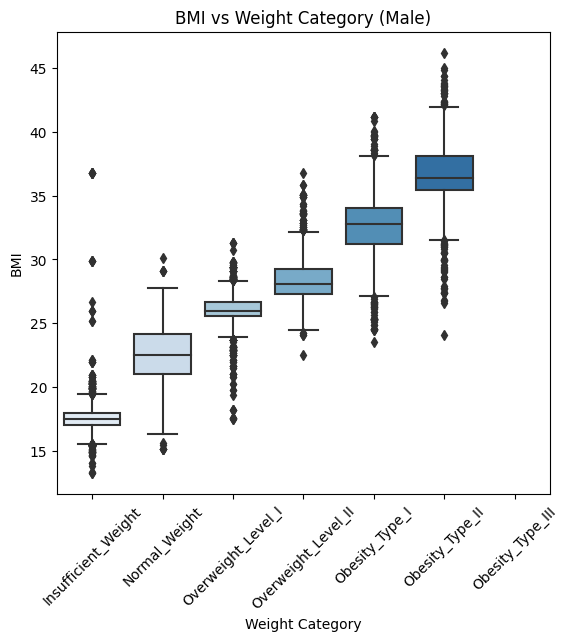

In [52]:
plt.figure(figsize=(14,6))

# Male
plt.subplot(1, 2, 1)
sns.boxplot(
    x='WeightCategory',
    y='BMI',
    data=df_male_balanced,
    order=order,
    palette='Blues'
)
plt.title('BMI vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)


In [56]:
outlier_counts = {}

for cat, group in df_male_balanced.groupby('WeightCategory'):
    Q1 = group['BMI'].quantile(0.25)
    Q3 = group['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = group[(group['BMI'] < lower) | (group['BMI'] > upper)]
    outlier_counts[cat] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['WeightCategory', 'Outlier_Count'])
print(outlier_df)


        WeightCategory  Outlier_Count
0  Insufficient_Weight            148
1        Normal_Weight             12
2       Obesity_Type_I             71
3      Obesity_Type_II             70
4   Overweight_Level_I            156
5  Overweight_Level_II             60


In [59]:
outliers

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
31,9555,Male,21.391371,1.647768,88.675503,1,yes,2.720701,1.000000,Sometimes,no,1.278231,no,0.557130,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,32.659650
323,8881,Male,33.000000,1.700000,97.920350,1,yes,2.000000,2.701521,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,33.882474
513,9074,Male,33.000000,1.850000,83.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Frequently,Automobile,Overweight_Level_II,24.251278
656,453,Male,33.185661,1.700627,103.669116,1,yes,2.000000,2.831771,Sometimes,no,1.959531,no,1.194519,0.000000,no,Public_Transportation,Overweight_Level_II,35.845220
711,6773,Male,33.000000,1.700000,97.000000,1,yes,3.000000,3.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II,33.564014
889,9786,Male,23.000000,1.700000,95.000000,1,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Public_Transportation,Overweight_Level_II,32.871972
1181,11808,Male,21.000000,1.650000,88.000000,1,yes,2.000000,2.962004,Sometimes,no,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Overweight_Level_II,32.323232
1242,13420,Male,19.266287,1.507867,79.697278,1,no,3.000000,1.000000,Sometimes,no,2.000000,no,0.868721,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,35.052372
1320,9786,Male,23.000000,1.700000,95.000000,1,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Public_Transportation,Overweight_Level_II,32.871972
1384,13420,Male,19.266287,1.507867,79.697278,1,no,3.000000,1.000000,Sometimes,no,2.000000,no,0.868721,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,35.052372


In [65]:
# Filter only Overweight_Level_II outliers
overweight_2_outliers = outliers[outliers['WeightCategory'] == 'Overweight_Level_II']

from IPython.display import display

display(overweight_2_outliers)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
31,9555,Male,21.391371,1.647768,88.675503,1,yes,2.720701,1.000000,Sometimes,no,1.278231,no,0.557130,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,32.659650
323,8881,Male,33.000000,1.700000,97.920350,1,yes,2.000000,2.701521,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,33.882474
513,9074,Male,33.000000,1.850000,83.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Frequently,Automobile,Overweight_Level_II,24.251278
656,453,Male,33.185661,1.700627,103.669116,1,yes,2.000000,2.831771,Sometimes,no,1.959531,no,1.194519,0.000000,no,Public_Transportation,Overweight_Level_II,35.845220
711,6773,Male,33.000000,1.700000,97.000000,1,yes,3.000000,3.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II,33.564014
889,9786,Male,23.000000,1.700000,95.000000,1,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Public_Transportation,Overweight_Level_II,32.871972
1181,11808,Male,21.000000,1.650000,88.000000,1,yes,2.000000,2.962004,Sometimes,no,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Overweight_Level_II,32.323232
1242,13420,Male,19.266287,1.507867,79.697278,1,no,3.000000,1.000000,Sometimes,no,2.000000,no,0.868721,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,35.052372
1320,9786,Male,23.000000,1.700000,95.000000,1,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Public_Transportation,Overweight_Level_II,32.871972
1384,13420,Male,19.266287,1.507867,79.697278,1,no,3.000000,1.000000,Sometimes,no,2.000000,no,0.868721,1.000000,Sometimes,Public_Transportation,Overweight_Level_II,35.052372


In [66]:
# Filter Overweight_Level_II outliers with BMI < 30
overweight_2_outliers = outliers[
    (outliers['WeightCategory'] == 'Overweight_Level_II') &
    (outliers['BMI'] < 30)
]

# Display first 10 rows nicely
from IPython.display import display
display(overweight_2_outliers.head(10))


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
513,9074,Male,33.000000,1.850000,83.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.00000,0.0,Frequently,Automobile,Overweight_Level_II,24.251278
3003,9074,Male,33.000000,1.850000,83.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.00000,0.0,Frequently,Automobile,Overweight_Level_II,24.251278
5199,2977,Male,21.538225,1.696412,69.242354,1,no,2.749629,1.874532,Sometimes,no,1.517225,no,1.51789,0.0,no,Public_Transportation,Overweight_Level_II,24.060750
5561,2977,Male,21.538225,1.696412,69.242354,1,no,2.749629,1.874532,Sometimes,no,1.517225,no,1.51789,0.0,no,Public_Transportation,Overweight_Level_II,24.060750
8760,8398,Male,26.000000,1.740000,68.000000,0,no,3.000000,3.000000,Sometimes,no,1.000000,no,0.00000,1.0,Frequently,Automobile,Overweight_Level_II,22.460034


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]
X_scaled = StandardScaler().fit_transform(X)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # or more, depending on variance explained
pca_result = pca.fit_transform(X_scaled)


In [14]:
print(pca.explained_variance_ratio_)


[0.24386673 0.23437112 0.19513015 0.18112168 0.14551031]
